In [1]:
import pandas as pd
import numpy as np
from Utilities import load_model

In [33]:
import matplotlib.pyplot as plt

In [5]:
tf_idf_vectorizer = load_model("trained_models/tfidf_vectorizer_max50000.all.L1.joblib")
lgrg_L1 = load_model("trained_models/lgreg.all.L1.C0.1.joblib")

### Check for important features in logistic regression

In [6]:
tfidf_feature_names = tf_idf_vectorizer.get_feature_names()
sentiment_metric_names = ["corpus_score_sum", "corpus_score_ave", "negative_ratio", "most_negative_score", "word_num", "sentence_num", "num_of_question_mark", "num_of_exclaimation_mark"]
company_response_type = ["company_response_Closed", "company_response_Closed with explanation", "company_response_Closed with monetary relief", "company_response_Closed with non-monetary relief"]


In [32]:
lgrg_L1.coef_.T[1]

array([0.])

In [67]:
def get_nonzero_coef_names(lgrg_model, tfid_feature_names, sentiment_metric_names, company_response_type):
    """Get the feature names where logistic regression coefs are not zero"""
    nonzero_coefs = []
    abs_nonzero_coefs = []
    indexes = []
    feature_names = []
    for i in np.arange(len(lgrg_L1.coef_.T)):
        coef = lgrg_L1.coef_.T[i][0]
        
        if abs(coef) > 1e-8:
            nonzero_coefs.append(coef)
            abs_nonzero_coefs.append(abs(coef))
            indexes.append(i)
            if i < len(tfid_feature_names):
                feature_names.append(tfid_feature_names[i])
            elif i < (len(tfid_feature_names) + len(sentiment_metric_names)):
                feature_names.append(sentiment_metric_names[i - len(tfid_feature_names)])
            else:
                feature_names.append(company_response_type[i - len(sentiment_metric_names) - len(tfid_feature_names)])
                
    df = pd.DataFrame()
    df["index"] = indexes
    df["nonzero_coef"] = nonzero_coefs
    df["nonzero_abs_coef"] = abs_nonzero_coefs
    df["feature_names"] = feature_names
    
    return df
                

In [68]:
important_features = get_nonzero_coef_names(lgrg_L1,
                                            tfidf_feature_names,
                                            sentiment_metric_names,
                                            company_response_type)

In [69]:
len(important_features)

310

In [87]:
sorted_important_features = important_features.sort_values(by=["nonzero_abs_coef"], ascending=False)

In [90]:
sorted_important_features[:20]

,index,nonzero_coef,nonzero_abs_coef,feature_names
267,44887,7.232970,7.232970,tcpa
245,41143,3.736539,3.736539,scottrade
18,2712,3.416254,3.416254,american express
102,15883,2.989087,2.989087,equifax
270,45104,-2.833702,2.833702,thank
27,3739,2.324839,2.324839,attached
194,32645,-2.195305,2.195305,payday
110,16688,2.187422,2.187422,failed
222,37498,2.123806,2.123806,refuse
49,7282,2.055631,2.055631,cfpb


### Interesting part of these important features. 

- tcpa is "(Telephone Consumer Protection Act) is a federal statute enacted in 1991 designed to safeguard consumer privacy."
- american express is the company with highest dispute rate in the EDA result
- equifax is the company with top 3 complaint number but lowest dispute ratio among top 20 companies
- words like failed, illege, violated, refused, fraud make sense to contribute to whether escalate or not


(array([  3.,  24., 138., 112.,  28.,   2.,   2.,   0.,   0.,   1.]),
 array([-2.83370184, -1.82703462, -0.8203674 ,  0.18629982,  1.19296703,
         2.19963425,  3.20630147,  4.21296869,  5.21963591,  6.22630313,
         7.23297034]),
 <a list of 10 Patch objects>)

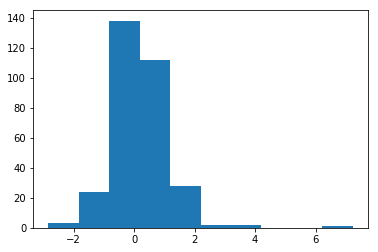

In [71]:
plt.hist(important_features["nonzero_coef"])

### Check important feature in Logistic regression L2

In [55]:
lgrg = load_model("trained_models/lgreg.all.joblib")
tfidf = load_model("trained_models/tfidf_vectorizer_max50000.all.joblib")

In [59]:
tfidf_feature_names_L2 = tfidf.get_feature_names()

In [61]:
coefs_L2 = get_nonzero_coef_names(lgrg, tfidf_feature_names_L2, sentiment_metric_names,company_response_type)

In [84]:
coefs_L2_sorted = coefs_L2.sort_values(by=["nonzero_abs_coef"], ascending=False)

In [85]:
coefs_L2_sorted.head(20)

,index,nonzero_coef,nonzero_abs_coef,feature_names
44920,45104,-2.833702,2.833702,thank
32509,32645,-2.195305,2.195305,payday
39118,39280,-1.911323,1.911323,request investigate
20479,20579,-1.757667,1.757667,husband
44379,44560,-1.654418,1.654418,sure
19716,19814,-1.466951,1.466951,help
42854,43030,-1.445660,1.445660,speak
48709,48908,-1.414781,1.414781,went
40584,40750,-1.389766,1.389766,sale date
42623,42799,-1.382292,1.382292,situation


### Check the feature names with highest tf-idf score

In [ ]:
complaints = pd.read_csv("Complaint")